## Car price prediction

### Notes
1. Examples of nominal data include country, gender, race, hair color etc.
2. Ordinal data is a kind of categorical data with a set order or scale to it. For example, ordinal data is said to have been collected when a responder inputs his/her financial happiness level on a scale of 1-10.
3. Examples of ordinal variables include: socio economic status (“low income”,”middle income”,”high income”), education level (“high school”,”BS”,”MS”,”PhD”), income level (“less than 50K”, “50K-100K”, “over 100K”), satisfaction rating (“extremely dislike”, “dislike”, “neutral”, “like”, “extremely like”).

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("dataset/car_data/CarPrice_Assignment.csv")
data.shape

(205, 26)

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [6]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [7]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [8]:
unique_list = ['CarName', 'drivewheel', 'enginetype']
for i in range(len(unique_list)):
    print(f'{unique_list[i]} has unique values: {X[unique_list[i]].unique()}')

CarName has unique values: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick 

In [9]:
# data['enginetype'].value_counts()
X["OHC_Code"] = np.where(X["enginetype"].str.contains("ohc"), 1, 0)
X.drop(['enginetype'], axis=1, inplace=True)

In [10]:
# data['cylindernumber'].value_counts()
X["four_cylinder"] = np.where(X["cylindernumber"].str.contains("four"), 1, 0)
X.drop(['cylindernumber'], axis=1, inplace=True)

In [11]:
# Handling categorical features
pd.get_dummies(X, columns=["symboling", "fueltype", "aspiration", "doornumber", "carbody"], prefix=["symboling", "fueltype", "aspiration", "doornumber", "carbody"]).head()

,CarName,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,...,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,alfa-romero giulia,rwd,front,88.6,168.8,64.1,48.8,2548,130,mpfi,...,1,1,0,0,1,1,0,0,0,0
1,alfa-romero stelvio,rwd,front,88.6,168.8,64.1,48.8,2548,130,mpfi,...,1,1,0,0,1,1,0,0,0,0
2,alfa-romero Quadrifoglio,rwd,front,94.5,171.2,65.5,52.4,2823,152,mpfi,...,1,1,0,0,1,0,0,1,0,0
3,audi 100 ls,fwd,front,99.8,176.6,66.2,54.3,2337,109,mpfi,...,1,1,0,1,0,0,0,0,1,0
4,audi 100ls,4wd,front,99.4,176.6,66.4,54.3,2824,136,mpfi,...,1,1,0,1,0,0,0,0,1,0


In [12]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X["cylindernumber_encoded"] = le.fit_transform(X["cylindernumber"])
# X[["cylindernumber", "cylindernumber_encoded"]].head()

In [13]:
X['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [14]:
X['doornumber'] = X['doornumber'].map({'two':2, 'four':4})
X[['doornumber']].head()

,doornumber
0,2
1,2
2,2
3,4
4,4


In [15]:
data['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [16]:
# As for enginelocation we have two categories, we can either use get_dummies() or map() function.
X['enginelocation'] = X['enginelocation'].map({'front':1, 'rear':0})
X[["enginelocation"]].head()

## get_dummies
## drop_first = True will remove first category to avoid dummy trap
# data_enginelocation = pd.get_dummies(X, columns=["enginelocation"], prefix=["enginelocation"], drop_first=True).head()
# data_enginelocation.head()

,enginelocation
0,1
1,1
2,1
3,1
4,1


In [17]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,OHC_Code,four_cylinder
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,1,1
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,1,1
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,1,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,1,0
3,2,audi 100 ls,gas,std,4,sedan,fwd,1,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,1,1
4,2,audi 100ls,gas,std,4,sedan,4wd,1,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,1,0


In [18]:
unique_list = ['fueltype', 'aspiration', 'carbody', 'fuelsystem']
for i in range(len(unique_list)):
    print(f'{unique_list[i]} has unique values: {X[unique_list[i]].unique()}')

fueltype has unique values: ['gas' 'diesel']
aspiration has unique values: ['std' 'turbo']
carbody has unique values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
fuelsystem has unique values: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [19]:
X['fueltype'] = X['fueltype'].map({'gas':0, 'diesel':1})
X['aspiration'] = X['aspiration'].map({'std':0, 'turbo':1})
X[['fueltype', 'aspiration']].head()

,fueltype,aspiration
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [20]:
unique_list = ['CarName', 'drivewheel']
for i in range(len(unique_list)):
    print(f'{unique_list[i]} has unique values: {X[unique_list[i]].unique()}')

CarName has unique values: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick 

In [21]:
X["drivewheel_fwd"] = np.where(X["drivewheel"].str.contains("fwd"), 1, 0)
X["fuelsystem_mpfi"] = np.where(X["fuelsystem"].str.contains("mpfi"), 1, 0)
X["carbody_sedan"] = np.where(X["carbody"].str.contains("sedan"), 1, 0)
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,OHC_Code,four_cylinder,drivewheel_fwd,fuelsystem_mpfi,carbody_sedan
0,3,alfa-romero giulia,0,0,2,convertible,rwd,1,88.6,168.8,...,9.0,111,5000,21,27,1,1,0,1,0
1,3,alfa-romero stelvio,0,0,2,convertible,rwd,1,88.6,168.8,...,9.0,111,5000,21,27,1,1,0,1,0
2,1,alfa-romero Quadrifoglio,0,0,2,hatchback,rwd,1,94.5,171.2,...,9.0,154,5000,19,26,1,0,0,1,0
3,2,audi 100 ls,0,0,4,sedan,fwd,1,99.8,176.6,...,10.0,102,5500,24,30,1,1,1,1,1
4,2,audi 100ls,0,0,4,sedan,4wd,1,99.4,176.6,...,8.0,115,5500,18,22,1,0,0,1,1


In [22]:
X.drop(['CarName', 'drivewheel', 'carbody', 'fuelsystem'], axis=1, inplace=True)

In [23]:
X['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [24]:
correlation = data[["symboling", "doornumber", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]].corr()


<AxesSubplot:>

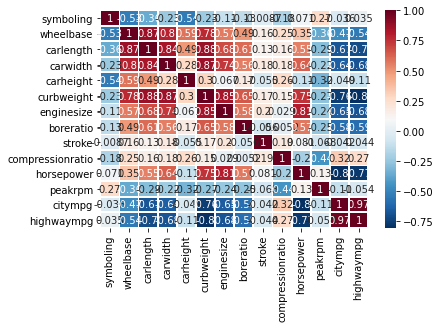

In [25]:
import seaborn as sb

sb.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8)

In [26]:
# from sklearn.model_selection import train_test_split

# X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=33)

In [27]:
X.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'OHC_Code', 'four_cylinder',
       'drivewheel_fwd', 'fuelsystem_mpfi', 'carbody_sedan'],
      dtype='object')

In [28]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
unique_list = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
for i in range(len(unique_list)):
    X[[unique_list[i]]] = X_scaler.fit_transform(X[[unique_list[i]]])
print(X.head())

   symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0        1.0         0           0           2               1   0.058309   
1        1.0         0           0           2               1   0.058309   
2        0.6         0           0           2               1   0.230321   
3        0.8         0           0           4               1   0.384840   
4        0.8         0           0           4               1   0.373178   

   carlength  carwidth  carheight  curbweight  ...  compressionratio  \
0   0.413433  0.316667   0.083333    0.411171  ...            0.1250   
1   0.413433  0.316667   0.083333    0.411171  ...            0.1250   
2   0.449254  0.433333   0.383333    0.517843  ...            0.1250   
3   0.529851  0.491667   0.541667    0.329325  ...            0.1875   
4   0.529851  0.508333   0.541667    0.518231  ...            0.0625   

   horsepower   peakrpm   citympg  highwaympg  OHC_Code  four_cylinder  \
0    0.262500  0.346939  0.222

In [29]:
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(np.array(y).reshape(-1,1))

In [30]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR_model = LR.fit(X, y)
LR_model

LinearRegression()

In [31]:
LR_model.coef_

array([[ 0.04773639,  0.19016061,  0.02386589, -0.00550572, -0.28980945,
         0.16529284, -0.0855946 ,  0.21842248,  0.03518043,  0.13893428,
         0.60975547, -0.01392124, -0.12331698, -0.21341565, -0.03004741,
         0.1264153 , -0.17349104,  0.24616576,  0.05018409, -0.0768245 ,
        -0.05026023, -0.00296334,  0.02845476]])

In [32]:
LR_model.intercept_

array([0.18045632])

In [33]:
LR_model.score(X, y)

0.8939671697200186

## Saving the model

In [34]:
from pickle import dump

dump(LR_model, open('car_price_lr_model.pkl', 'wb'))
# save the scaler
dump(X_scaler, open('x_scaler.pkl', 'wb'))
# save the scaler
dump(y_scaler, open('y_scaler.pkl', 'wb'))
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [35]:
# make predictions on the test set
y_pred = LR_model.predict(np.array(X.iloc[0]).reshape(1,-1)) # Scaled X_Test
y_pred

array([[0.15694026]])

In [36]:
real_prediction = y_scaler.inverse_transform(y_pred)
real_prediction

array([[11439.86761521]])

# Following is feature selection technique however it didn't help to achieve accuracy

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
# Feature extraction
# Feature selection using Chi square can only accept positive values. So, in case of negative values normalization or standarization techniques should be used.
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X, y.astype('int'))

In [39]:
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [40]:
featurescores = pd.concat([dfcolumns, dfscore], axis=1)
featurescores.columns = ['spec', 'score']

## Bigger is better
## Consider bigger number as more important.
featurescores

,spec,score
0,symboling,0.001951
1,fueltype,0.098039
2,aspiration,0.181373
3,doornumber,0.405178
4,enginelocation,0.000218
5,wheelbase,0.422686
6,carlength,0.287942
7,carwidth,0.554239
8,carheight,0.039660
9,curbweight,0.490838


In [41]:
best_features = []

for feature, score in featurescores.iterrows():
    if score[1] > 100:
        best_features.append(score[0])
print(best_features)

[]


In [42]:
X_latest = X[best_features]
X_latest.head()

""
0
1
2
3
4


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_latest, y, test_size=0.2, random_state=33)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr_model = lr.fit(X_train, y_train)
lr_model

ValueError: at least one array or dtype is required

In [ ]:
lr_model.coef_

In [ ]:
lr_model.intercept_

In [ ]:
lr_model.score(X_train, y_train)